## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Importing Dataset

In [2]:
dataset = pd.read_csv('datasets/energy_efficiency_data.csv')
'''
alternative:
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
'''
print(dataset.columns)
dataset.head()

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## Q12 - Simple Linear Regression with one variable

<AxesSubplot:xlabel='T2', ylabel='T6'>

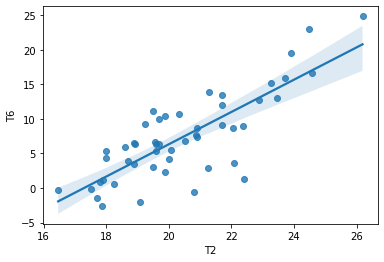

In [3]:
# create sub-dataset with the inside and outside tempearature columns
inout_df = dataset[['T2', 'T6']].sample(50, random_state=5)

# regression plot for visualizing 50 samples
sns.regplot(x='T2', y='T6', data=inout_df)

In [4]:
# select the T2 column as x
temp_in_df = dataset[['T2']]

# select the T3 column as target y
temp_out_df = dataset['T3']

# split data into train and test at 70:30 split ratio
x_train, x_test, y_train, y_test = train_test_split(temp_in_df, 
                                                    temp_out_df,
                                                    test_size=0.3,
                                                    random_state=5)

In [5]:
# build linear regression model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# run prediction
prediction = linear_model.predict(x_test)

In [6]:
# get r2 score from the linear model prediction
r2 = r2_score(y_test, prediction)
round(r2, 2)

0.54

## Q13 - Linear Regression with multiple variables

In [7]:
# drop 'date' and 'lights' columns
dropped_dataset = dataset.drop(columns=['date', 'lights'])
print(dropped_dataset.columns)
dropped_dataset.head()

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')


,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
# normalize the dataset with MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(dropped_dataset), columns=dropped_dataset.columns)

features_df = normalised_df.drop(columns=['Appliances'])
target = normalised_df['Appliances']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(features_df,
                                                    target, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [10]:
# build the linear regression model
linear_model = LinearRegression().fit(x_train, y_train)

# run prediction
predicted_values = linear_model.predict(x_test)

## MAE

In [11]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)

# round up to 2 decimal places
round(mae, 2)

0.05

## Q14 - RSS

In [12]:
# Residual Sum of Squares
rss = np.sum(np.square(y_test - predicted_values))

# round up to 2 decimal places
round(rss, 2) 

45.35

## Q15 - RMSE

In [13]:
# Root Mean Squared Error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))

# round up to 3 decimal places
round(rmse, 3)

0.088

## Q16 - Coefficient of Determination

In [14]:
# get r2 score of predicted_vales from Q13
r2 = r2_score(y_test, predicted_values)

# round up to 2 decimal places
round(r2, 2)

0.15

## Q17 - Lowest and Highest feature weights

In [15]:
def get_weights_df(model, feature, col_name):
    
    '''Returns the weight of every feature'''
    
    weights = pd.Series(model.coef_, feature.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    
    return weights_df

In [16]:
# get weights of the linear model
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')

# sort by lowest to highest
linear_model_weights.groupby('Features', sort=True)
print(linear_model_weights)

       Features  Linear_Model_Weight
0          RH_2            -0.456698
1         T_out            -0.321860
2            T2            -0.236178
3            T9            -0.189941
4          RH_8            -0.157595
5        RH_out            -0.077671
6          RH_7            -0.044614
7          RH_9            -0.039800
8            T5            -0.015657
9            T1            -0.003281
10          rv1             0.000770
11          rv2             0.000770
12  Press_mm_hg             0.006839
13           T7             0.010319
14   Visibility             0.012307
15         RH_5             0.016006
16         RH_4             0.026386
17           T4             0.028981
18    Windspeed             0.029183
19         RH_6             0.038049
20         RH_3             0.096048
21           T8             0.101995
22    Tdewpoint             0.117758
23           T6             0.236425
24           T3             0.290627
25         RH_1             0.553547


## Q18 - Ridge Regression

In [17]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)

# build and run the ridge regression model
ridge_model = ridge_reg.fit(x_train, y_train)
ridge_prediction = ridge_model.predict(x_test)

In [18]:
# New RMSE on ridge regression
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_prediction))
round(ridge_rmse, 3)

0.088

## Q19 - Lasso Regression

In [19]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)

# build and run the lasso regression model
lasso_model = lasso_reg.fit(x_train, y_train)
lasso_prediction = lasso_model.predict(x_test)

In [20]:
# feature weights for lasso regression
lasso_model_weights = get_weights_df(lasso_model, x_train, 'Lasso_Regression_Weight')
print(lasso_model_weights)

# count number of non-zero feature weights
print('\nNon-zero feature weights count: ', lasso_model_weights['Lasso_Regression_Weight'].astype(bool).sum(axis=0))

       Features  Lasso_Regression_Weight
0        RH_out                -0.049557
1          RH_8                -0.000110
2            T1                 0.000000
3     Tdewpoint                 0.000000
4    Visibility                 0.000000
5   Press_mm_hg                -0.000000
6         T_out                 0.000000
7          RH_9                -0.000000
8            T9                -0.000000
9            T8                 0.000000
10         RH_7                -0.000000
11          rv1                -0.000000
12           T7                -0.000000
13           T6                 0.000000
14         RH_5                 0.000000
15           T5                -0.000000
16         RH_4                 0.000000
17           T4                -0.000000
18         RH_3                 0.000000
19           T3                 0.000000
20         RH_2                -0.000000
21           T2                 0.000000
22         RH_6                -0.000000
23          rv2 

## Q20

In [21]:
# New RMSE with Lasso Regression
rmse = np.sqrt(mean_squared_error(y_test, lasso_prediction))
round(rmse, 3)

0.094